In [112]:
# 
import os
os.getcwd()

'C:\\Users\\freddy\\Desktop\\!!!!!!!!!!! Intelligence Artificielle\\A58 Zemirli\\TP A58'

In [229]:
# Créer un fichier regroupant tous les fichiers contenant les Tweets
path = './MACOSX/' 
#'C:/Users/freddy/Desktop/!!!!!!!!!!! Intelligence Artificielle/A58 Zemirli/!!!!!  Projet-session/MACOSX/'
f=[] 
filenames = os.listdir(path)
for name in filenames:
    f.append(name)
print(f)

for i in range(0, len(f)):
    with open(path+'AllNews.txt', 'w', encoding='utf-8') as outfile:
        for fname in f:
            with open(fname, encoding='utf-8') as infile:
                for line in infile:
                    outfile.write(fname.replace(".txt"," ")+"|"+line)

['bbchealth.txt', 'cbchealth.txt', 'cnnhealth.txt', 'everydayhealth.txt', 'foxnewshealth.txt', 'gdnhealthcare.txt', 'goodhealth.txt', 'KaiserHealthNews.txt', 'latimeshealth.txt', 'msnhealthnews.txt', 'NBChealth.txt', 'nprhealth.txt', 'nytimeshealth.txt', 'reuters_health.txt', 'usnewshealth.txt', 'wsjhealth.txt']


In [230]:
# Remplacement de caracteres
f=open(path+'AllNews.txt','r', encoding="utf-8") 
chaine=f.read().replace(' | ','$')  

f.close() 
f=open(path1+'AllNews.txt','w', encoding="utf-8") 
f.write(chaine) 
f.close()

In [231]:
#path1= 'C:/Users/freddy/Desktop/!!!!!!!!!!! Intelligence Artificielle/A58 Zemirli/TP A58/MACOSX/'
# Remplacement de caracteres
f=open(path+'AllNews.txt','r', encoding="utf-8") 
chaine=f.read().replace(' |','|')  

f.close() 
f=open(path+'AllNews.txt','w', encoding="utf-8") 
f.write(chaine) 
f.close()

In [232]:
#Chargement et création du dataframe
import pandas as pd
#path= 'C:/Users/freddy/Desktop/!!!!!!!!!!! Intelligence Artificielle/A58 Zemirli/TP A58/MACOSX/'

df = pd.read_csv(path+'AllNews.txt', sep='|', names=['Media','Id', 'date','Tweet_Original'])
df.set_index(["Id",])
df.head()

Media                  Id                            date  \
0  bbchealth  585978391360221184  Thu Apr 09 01:31:50 +0000 2015   
1  bbchealth  585947808772960257  Wed Apr 08 23:30:18 +0000 2015   
2  bbchealth  585947807816650752  Wed Apr 08 23:30:18 +0000 2015   
3  bbchealth  585866060991078401  Wed Apr 08 18:05:28 +0000 2015   
4  bbchealth  585794106170839041  Wed Apr 08 13:19:33 +0000 2015   

                                      Tweet_Original  
0  Breast cancer risk test devised http://bbc.in/...  
1  GP workload harming care - BMA poll http://bbc...  
2  Short people's 'heart risk greater' http://bbc...  
3  New approach against HIV 'promising' http://bb...  
4  Coalition 'undermined NHS' - doctors http://bb...

In [233]:
# Taille du dataframe
print(df.dtypes)
print("*"*20)
print(df.shape)

Media             object
Id                object
date              object
Tweet_Original    object
dtype: object
********************
(63027, 4)


In [236]:
# Supprimer les lignes vides 
df.dropna(inplace = True) 


In [237]:
# Catégoriser les Tweets par Type: Texte, Video, Audio, Commentaires 
df["Tweet_Original"]= df["Tweet_Original"].astype(str) 

df["type"] = df["Tweet_Original"].apply(lambda x: "VIDEO" if x.startswith("VIDEO:") else "AUDIO" if x.startswith("AUDIO:") else "RT" if x.startswith("RT @") else "TEXTE")
print(df[["Tweet_Original","type"]][621:625])
print("*"*20)
print(df[["Tweet_Original","type"]][4558:4562])


                                        Tweet_Original   type
621  VIDEO: Worst A&amp;E waiting times in a decade...  VIDEO
622  Ebola nurse 'critical for some time' http://bb...  TEXTE
623  Flu cases 'highest for three years' http://bbc...  TEXTE
624  AUDIO: Drug company 'may take legal action' ht...  AUDIO
********************
                                         Tweet_Original   type
4558  Dr. Kent Brantly, Ebola survivor, visits Ottaw...  TEXTE
4559  RT @PDakinHealth: Quadrupling of # of young ad...     RT
4560  Should women get paid menstrual leave? The deb...  TEXTE
4561  Rob Sheardown's dog Bella helps save man from ...  TEXTE


In [238]:
# Calcul du nombre de caractères speciaux
ch1="://"
ch2="$"
df["car_speciaux"] = df["Tweet_Original"].map(lambda x: len([x for x in x.split() if ch1 in x or ch2 in x ]))

df[["Tweet_Original","car_speciaux"]][621:625]


Tweet_Original  car_speciaux
621  VIDEO: Worst A&amp;E waiting times in a decade...             1
622  Ebola nurse 'critical for some time' http://bb...             1
623  Flu cases 'highest for three years' http://bbc...             1
624  AUDIO: Drug company 'may take legal action' ht...             1

In [240]:
#calcul du nombre de mots sur chaque tweet
df["nombre_mots"] = df[["Tweet_Original"]].applymap(lambda x: len(str(x).split(" ")))

In [241]:
#Calcul de la longueur moyenne de mots 
def moyenne_mot(phrase):
    mots = phrase.split(" ")
    return sum(len(mot) for mot in mots)/len(mots)

df["long_moyenne_mot"] = df["Tweet_Original"].map(lambda x: moyenne_mot(x))
df[["Tweet_Original","long_moyenne_mot"]].head()

Tweet_Original  long_moyenne_mot
0  Breast cancer risk test devised http://bbc.in/...          8.000000
1  GP workload harming care - BMA poll http://bbc...          6.250000
2  Short people's 'heart risk greater' http://bbc...          8.666667
3  New approach against HIV 'promising' http://bb...          8.833333
4  Coalition 'undermined NHS' - doctors http://bb...          8.833333

In [242]:
df.dtypes


Media                object
Id                   object
date                 object
Tweet_Original       object
type                 object
car_speciaux          int64
nombre_mots           int64
long_moyenne_mot    float64
dtype: object

In [243]:
# Fragmenter la date du Tweet en année/mois/jour
df["date"]= pd.to_datetime(df["date"])


In [244]:
df['year'] = pd.DatetimeIndex(df['date']).year.astype('int64')


In [246]:
df['month'] = pd.DatetimeIndex(df['date']).month.astype('int64')
df['day'] = pd.DatetimeIndex(df['date']).day.astype('int64')

df.dtypes

Media                       object
Id                          object
date                datetime64[ns]
Tweet_Original              object
type                        object
car_speciaux                 int64
nombre_mots                  int64
long_moyenne_mot           float64
year                         int64
month                        int64
day                          int64
dtype: object

In [247]:
df.head()

Media                  Id                date  \
0  bbchealth  585978391360221184 2015-04-09 01:31:50   
1  bbchealth  585947808772960257 2015-04-08 23:30:18   
2  bbchealth  585947807816650752 2015-04-08 23:30:18   
3  bbchealth  585866060991078401 2015-04-08 18:05:28   
4  bbchealth  585794106170839041 2015-04-08 13:19:33   

                                      Tweet_Original   type  car_speciaux  \
0  Breast cancer risk test devised http://bbc.in/...  TEXTE             1   
1  GP workload harming care - BMA poll http://bbc...  TEXTE             1   
2  Short people's 'heart risk greater' http://bbc...  TEXTE             1   
3  New approach against HIV 'promising' http://bb...  TEXTE             1   
4  Coalition 'undermined NHS' - doctors http://bb...  TEXTE             1   

   nombre_mots  long_moyenne_mot  year  month  day  
0            6          8.000000  2015      4    9  
1            8          6.250000  2015      4    8  
2            6          8.666667  2015      4    8  
3            6          8.833333  2015      4    8  
4            6          8.833333  2015      4    8

In [248]:
df.dtypes

Media                       object
Id                          object
date                datetime64[ns]
Tweet_Original              object
type                        object
car_speciaux                 int64
nombre_mots                  int64
long_moyenne_mot           float64
year                         int64
month                        int64
day                          int64
dtype: object

#  Statistiques et visualisations univariées et bivariées


In [249]:
 df.describe()

car_speciaux   nombre_mots  long_moyenne_mot          year  \
count  63026.000000  63026.000000      63026.000000  63026.000000   
mean       0.989147     12.431044          7.284186   2013.557659   
std        0.807075     12.549986          2.262152      0.983666   
min        0.000000      1.000000          1.869565   2011.000000   
25%        1.000000      9.000000          6.000000   2013.000000   
50%        1.000000     11.000000          6.818182   2014.000000   
75%        1.000000     15.000000          7.833333   2014.000000   
max      154.000000   2449.000000         34.500000   2015.000000   

              month           day  
count  63026.000000  63026.000000  
mean       6.153587     15.527893  
std        3.780468      8.686537  
min        1.000000      1.000000  
25%        3.000000      8.000000  
50%        6.000000     15.000000  
75%       10.000000     23.000000  
max       12.000000     31.000000

       car_speciaux  nombre_mots  long_moyenne_mot  year  month  day
0                 1            6          8.000000  2015      4    9
1                 1            8          6.250000  2015      4    8
2                 1            6          8.666667  2015      4    8
3                 1            6          8.833333  2015      4    8
4                 1            6          8.833333  2015      4    8
5                 1            7          7.142857  2015      4    8
6                 1           12          5.000000  2015      4    8
7                 1            7          8.714286  2015      4    8
8                 1            6          8.000000  2015      4    8
9                 1            8          6.875000  2015      4    7
10                1            6          7.333333  2015      4    7
11                1            7          7.428571  2015      4    7
12                1            7          7.000000  2015      4    7
13                1           11  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B3E9A9DF28>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001B3E98EDE80>]], dtype=object)

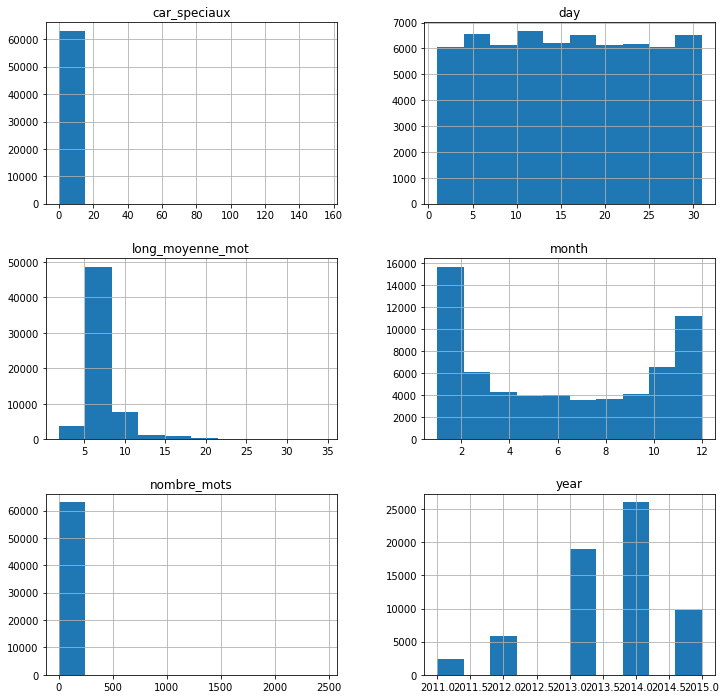

In [250]:
attributs_numeriques = df.select_dtypes(include=['int64','float64'])
print(attributs_numeriques)
attributs_numeriques.hist(figsize=(12,12))

In [251]:
# Nombre de tweets par type de Tweet
print (df['type'].value_counts())

TEXTE    54418
RT        7631
VIDEO      816
AUDIO      161
Name: type, dtype: int64


In [252]:
# Nombre de tweets par année 
print (df['year'].value_counts())

2014    26053
2013    18989
2015     9815
2012     5802
2011     2367
Name: year, dtype: int64


In [253]:
# Nombre de tweets par mois 
print (df['month'].value_counts())

1     7919
2     7758
10    6531
3     6118
12    5848
11    5366
4     4254
9     4090
6     4015
5     3959
8     3648
7     3520
Name: month, dtype: int64


In [254]:
# Nombre de tweets par jour 
print (df['day'].value_counts())

11    2360
17    2338
26    2304
12    2272
24    2248
20    2229
6     2210
4     2208
3     2145
13    2140
5     2134
16    2123
8     2117
14    2089
18    2070
19    2067
2     2061
10    2037
9     2015
23    2008
7     1989
15    1989
25    1947
22    1926
1     1858
21    1834
28    1812
30    1807
27    1807
29    1755
31    1127
Name: day, dtype: int64


# Les visualisations

In [255]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

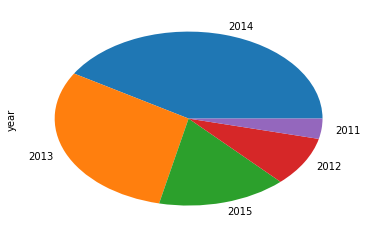

In [256]:
df['year'].value_counts(normalize=True).plot(kind='pie')

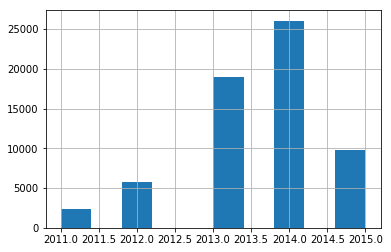

In [257]:
df['year'].hist()

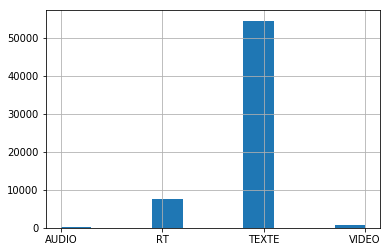

In [258]:
# Par Type de Tweet
df["type"].hist()


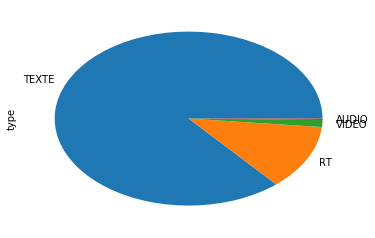

In [259]:
df['type'].value_counts(normalize=True).plot(kind='pie')

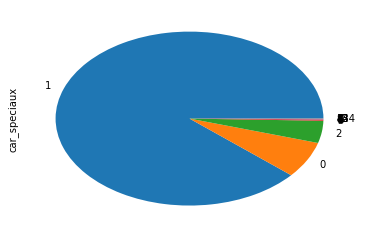

In [260]:
# Par Type de Tweet
df['car_speciaux'].value_counts(normalize=True).plot(kind='pie')

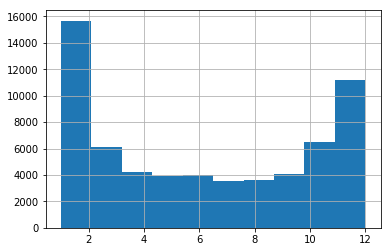

In [261]:

df['month'].hist()

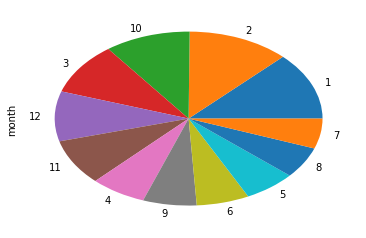

In [262]:
df['month'].value_counts(normalize=True).plot(kind='pie')
#print("*"*20)

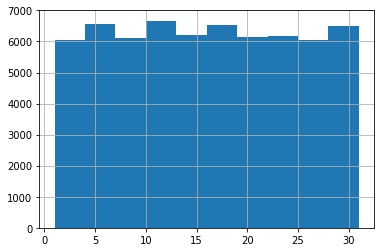

In [263]:
df['day'].hist()

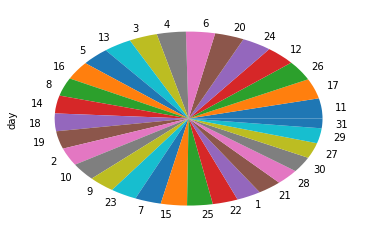

In [264]:
df['day'].value_counts(normalize=True).plot(kind='pie')


# Analyse Bivariée

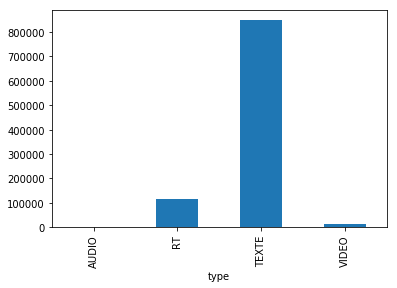

In [265]:
df.groupby('type')['day'].sum().plot(kind='bar')


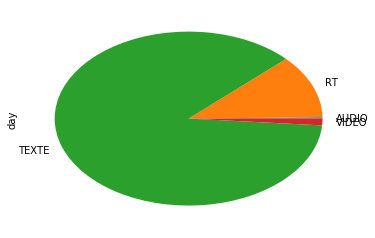

In [266]:
df.groupby('type')['day'].sum().plot(kind='pie')


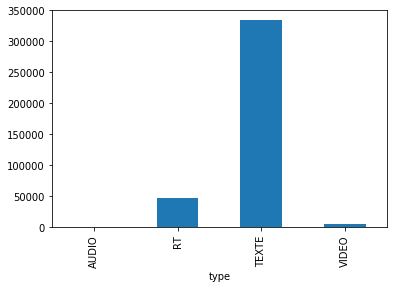

In [267]:
df.groupby('type')['month'].sum().plot(kind='bar')


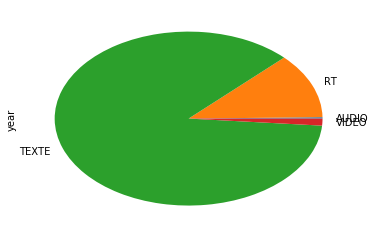

In [268]:
df.groupby('type')['year'].sum().plot(kind='pie')


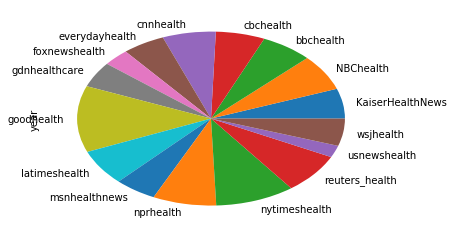

In [269]:
df.groupby('Media')['year'].sum().plot(kind='pie')


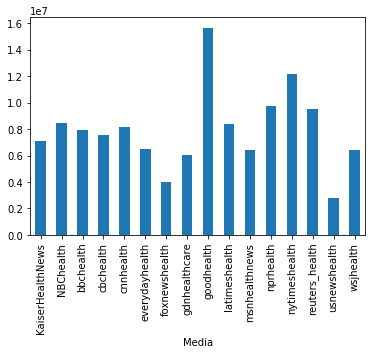

In [270]:
df.groupby('Media')['year'].sum().plot(kind='bar')


In [271]:
# Type de Tweet de mots par année

type_map={"VIDEO":1,"AUDIO":2,"TEXTE":3,"RT":4}
df['Type_map'] = df.type.map(type_map)
df[['type','Type_map']][621:625]

type  Type_map
621  VIDEO         1
622  TEXTE         3
623  TEXTE         3
624  AUDIO         2

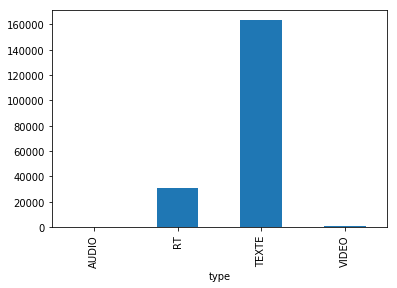

In [275]:
df.groupby('type')['Type_map'].sum().plot(kind='bar')

In [276]:
# Type de Tweet de mots par année

media_map={'AllNews':0, 'bbchealth':1, 'cbchealth':2, 'cnnhealth':3, 
           'everydayhealth':4, 'foxnewshealth':5, 'gdnhealthcare':6, 
           'goodhealth':7, 'KaiserHealthNews':8, 'latimeshealth':9, 
           'msnhealthnews':10, 'NBChealth':11, 'nprhealth':12, 
           'nytimeshealth':13, 'reuters_health':14, 'usnewshealth':15, 'wsjhealth':16}
        
df['Media_map'] = df.Media.map(media_map)

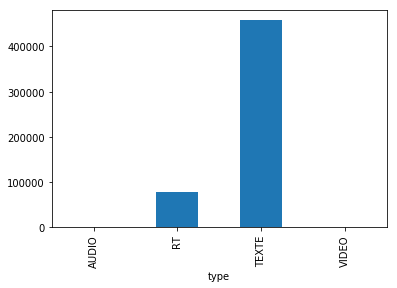

In [277]:
df.groupby('type')['Media_map'].sum().plot(kind='bar')


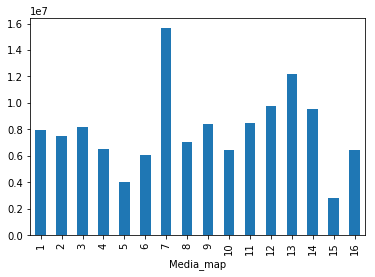

In [278]:
df.groupby('Media_map')['year'].sum().plot(kind='bar')


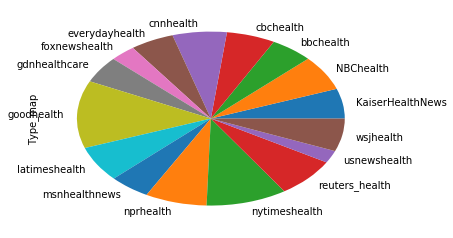

In [279]:
df.groupby('Media')['Type_map'].sum().plot(kind='pie')


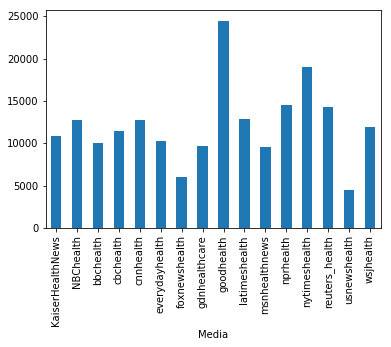

In [280]:
df.groupby('Media')['Type_map'].sum().plot(kind='bar')

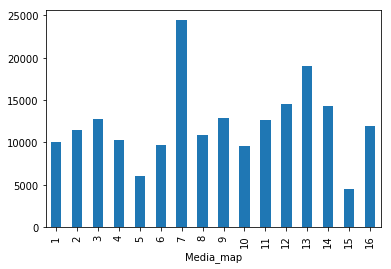

In [281]:
df.groupby('Media_map')['Type_map'].sum().plot(kind='bar')

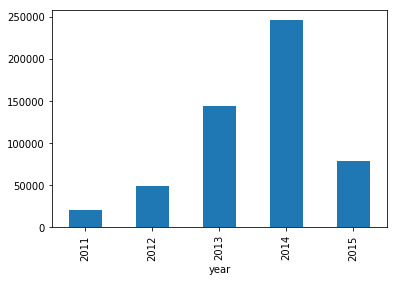

In [282]:
df.groupby('year')['Media_map'].sum().plot(kind='bar')

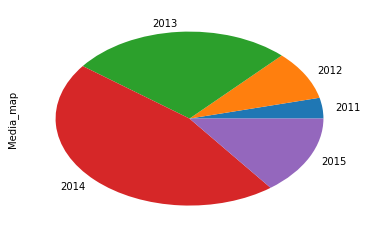

In [283]:
df.groupby('year')['Media_map'].sum().plot(kind='pie')

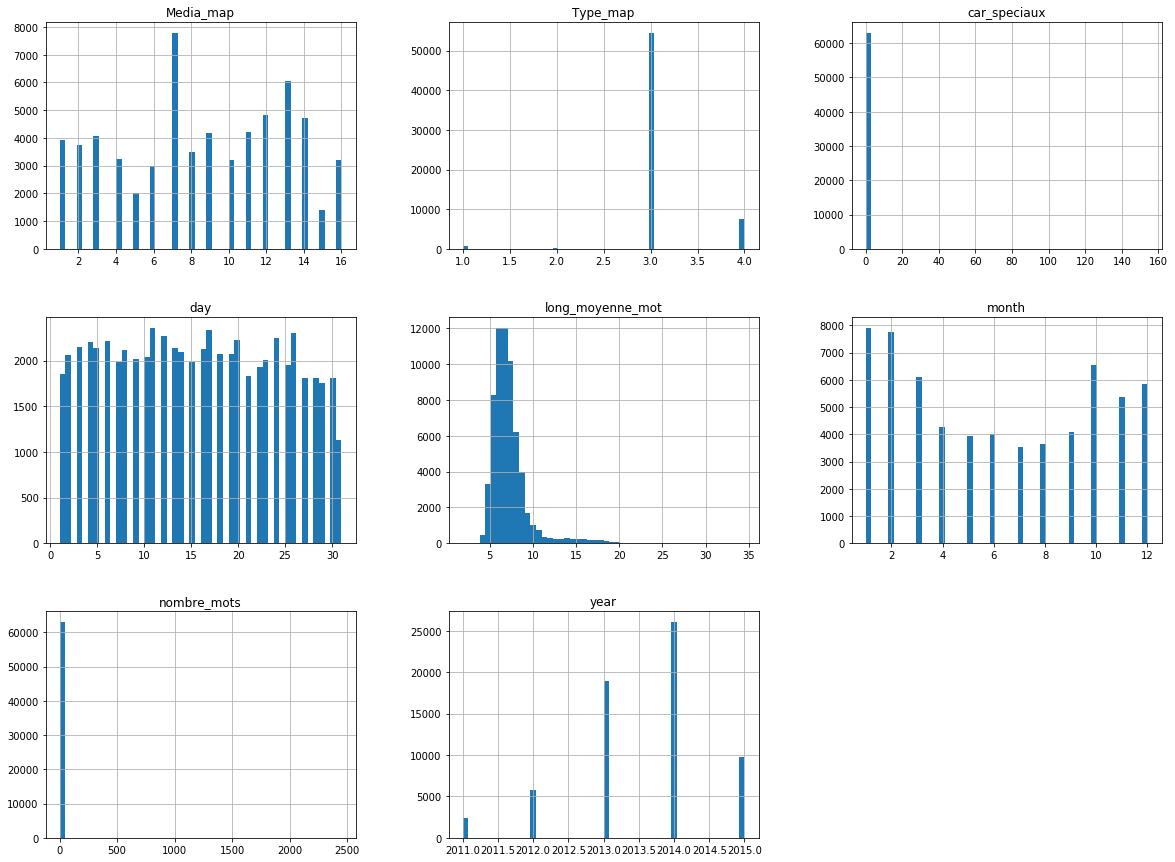

In [284]:
df.hist(bins=50, figsize=(20,15))
plt.show()

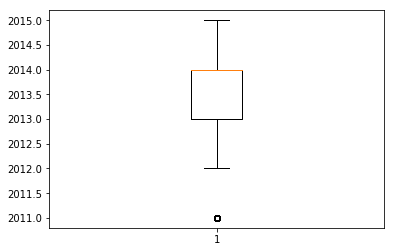

In [285]:
y = list(df.year) 
plt.boxplot(y) 
plt.show() 

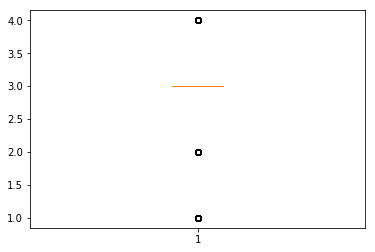

In [286]:
y = list(df.Type_map) 
plt.boxplot(y) 
plt.show() 

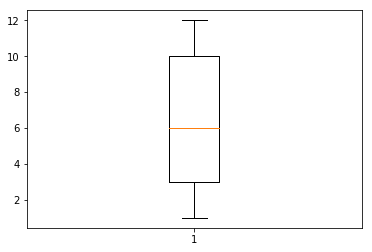

In [287]:
y = list(df.month) 
plt.boxplot(y) 
plt.show() 

In [289]:
df.head()

Media                  Id                date  \
0  bbchealth  585978391360221184 2015-04-09 01:31:50   
1  bbchealth  585947808772960257 2015-04-08 23:30:18   
2  bbchealth  585947807816650752 2015-04-08 23:30:18   
3  bbchealth  585866060991078401 2015-04-08 18:05:28   
4  bbchealth  585794106170839041 2015-04-08 13:19:33   

                                      Tweet_Original   type  car_speciaux  \
0  Breast cancer risk test devised http://bbc.in/...  TEXTE             1   
1  GP workload harming care - BMA poll http://bbc...  TEXTE             1   
2  Short people's 'heart risk greater' http://bbc...  TEXTE             1   
3  New approach against HIV 'promising' http://bb...  TEXTE             1   
4  Coalition 'undermined NHS' - doctors http://bb...  TEXTE             1   

   nombre_mots  long_moyenne_mot  year  month  day  Type_map  Media_map  
0            6          8.000000  2015      4    9         3          1  
1            8          6.250000  2015      4    8         3          1  
2            6          8.666667  2015      4    8         3          1  
3            6          8.833333  2015      4    8         3          1  
4            6          8.833333  2015      4    8         3          1

# Nettoyage des Tweets: caracteres spéciaux, ponctuations, .. avec les esxpresssions régulieres

In [290]:
import re
def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    
    return df

df["Tweet_Original"]= df3["Tweet_Original"].astype(str) 

path = './MACOSX/'
df['Tweet']=df3['Tweet_Original']
#df3['Tweet']=df3['Tweet_Original'].apply(lambda x: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", x))
clean_text(df3, 'Tweet')
#df3[621:625]
df.head()

Media                  Id                date  \
0  bbchealth  585978391360221184 2015-04-09 01:31:50   
1  bbchealth  585947808772960257 2015-04-08 23:30:18   
2  bbchealth  585947807816650752 2015-04-08 23:30:18   
3  bbchealth  585866060991078401 2015-04-08 18:05:28   
4  bbchealth  585794106170839041 2015-04-08 13:19:33   

                                      Tweet_Original   type  car_speciaux  \
0  Breast cancer risk test devised http://bbc.in/...  TEXTE             1   
1  GP workload harming care - BMA poll http://bbc...  TEXTE             1   
2  Short people's 'heart risk greater' http://bbc...  TEXTE             1   
3  New approach against HIV 'promising' http://bb...  TEXTE             1   
4  Coalition 'undermined NHS' - doctors http://bb...  TEXTE             1   

   nombre_mots  long_moyenne_mot  year  month  day  Type_map  Media_map  \
0            6          8.000000  2015      4    9         3          1   
1            8          6.250000  2015      4    8         3          1   
2            6          8.666667  2015      4    8         3          1   
3            6          8.833333  2015      4    8         3          1   
4            6          8.833333  2015      4    8         3          1   

                                               Tweet  
0  Breast cancer risk test devised http://bbc.in/...  
1  GP workload harming care - BMA poll http://bbc...  
2  Short people's 'heart risk greater' http://bbc...  
3  New approach against HIV 'promising' http://bb...  
4  Coalition 'undermined NHS' - doctors http://bb...

# ------------------------------------------------------------------------------------------ #
# ------------------------ Traitement des Tweets avec NLP ------------------ #
# ------------------------------------------------------------------------------------------ #

In [291]:
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
#import mpld3
df.shape

(63026, 14)

In [292]:
df['Tweet'][:10]

0    Breast cancer risk test devised http://bbc.in/...
1    GP workload harming care - BMA poll http://bbc...
2    Short people's 'heart risk greater' http://bbc...
3    New approach against HIV 'promising' http://bb...
4    Coalition 'undermined NHS' - doctors http://bb...
5    Review of case against NHS manager http://bbc....
6    VIDEO: 'All day is empty, what am I going to d...
7    VIDEO: 'Overhaul needed' for end-of-life care ...
8    Care for dying 'needs overhaul' http://bbc.in/...
9    VIDEO: NHS: Labour and Tory key policies http:...
Name: Tweet, dtype: object

# Stopwords, stemming, and tokenizing

# Stopwords

In [293]:
# Mettre en miniscule
#df3['Tweet'] = df3['Tweet'].str.lower()

from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words("english"))
for i in range(0, len(df["Tweet"])):
    words = nltk.word_tokenize(df["Tweet"][i])
    without_stop_words = [word for word in words if not word in stop_words]
    print(without_stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\freddy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['Breast', 'cancer', 'risk', 'test', 'devised', 'http', ':', '//bbc.in/1CimpJF']
['GP', 'workload', 'harming', 'care', '-', 'BMA', 'poll', 'http', ':', '//bbc.in/1ChTBRv']
['Short', 'people', "'s", "'heart", 'risk', 'greater', "'", 'http', ':', '//bbc.in/1ChTANp']
['New', 'approach', 'HIV', "'promising", "'", 'http', ':', '//bbc.in/1E6jAjt']
['Coalition', "'undermined", 'NHS', "'", '-', 'doctors', 'http', ':', '//bbc.in/1CnLwK7']
['Review', 'case', 'NHS', 'manager', 'http', ':', '//bbc.in/1Ffj6ci']
['VIDEO', ':', "'All", 'day', 'empty', ',', 'I', 'going', '?', "'", 'http', ':', '//bbc.in/1N7wSSz']
['VIDEO', ':', "'Overhaul", 'needed', "'", 'end-of-life', 'care', 'http', ':', '//bbc.in/1CmrRu3']
['Care', 'dying', "'needs", 'overhaul', "'", 'http', ':', '//bbc.in/1FdSGrl']
['VIDEO', ':', 'NHS', ':', 'Labour', 'Tory', 'key', 'poli

['Ebola', 'team', 'miss', "'human", 'touch', "'", 'http', ':', '//bbc.in/1yEzCLI']
['VIDEO', ':', 'Labour', 'calls', 'NHS', 'investment', 'http', ':', '//bbc.in/1vylVQH']
['VIDEO', ':', 'NHS', 'staff', 'set', 'help', 'fight', 'Ebola', 'http', ':', '//bbc.in/1yCk3UQ']
['NHS', 'staff', 'fly', 'fight', 'Ebola', 'http', ':', '//bbc.in/1xeA69c']
['VIDEO', ':', 'A', '&', 'amp', ';', 'Es', 'miss', 'four-hour', 'wait', 'standard', 'http', ':', '//bbc.in/1xdakSC']
['VIDEO', ':', 'Bid', "'remove", 'worst', 'bits', "'", 'Health', 'Act', 'http', ':', '//bbc.in/1xyePv2']
['A', '&', 'amp', ';', 'Es', 'miss', 'four-hour', 'wait', 'standard', 'http', ':', '//bbc.in/1qFUBPj']
['Early', 'sign', 'yellow', 'fever', 'found', 'http', ':', '//bbc.in/1qFnDi3']
['VIDEO', ':', "'Bed", 'blockers', 'face', 'legal', 'action', "'", 'http', ':', '//bbc.in/1qEGaen']
['MPs', 'debate', 'NHS', "'privatisation", "'", 'http', ':', '//bbc.in/1qDejvd']
["'No", 'fertility', 'help', 'cancer', 'young', "'", 'http', ':', '//bbc

["'Experience", 'dementia', 'via', 'Facebook', "'", 'http', ':', '//bbc.in/1kfC7g6']
['Half', 'cancer', "'live", 'decade', "'", 'http', ':', '//bbc.in/1m3BrvC']
['VIDEO', ':', 'Trust', 'fined', '£200K', 'patient', 'death', 'http', ':', '//bbc.in/QRKXIq']
['Teen', "'s", 'cancer', 'appeal', 'hits', '£3m', 'mark', 'http', ':', '//bbc.in/1ixo0oA']
['Trust', 'fined', '£227K', 'patient', 'death', 'http', ':', '//bbc.in/1fJK1vu']
['Strike', 'threat', 'health', 'salaries', 'http', ':', '//bbc.in/1k33AAh']
['Long', 'wait', 'chronic', 'pain', 'sufferers', 'http', ':', '//bbc.in/1k33xVc']
["'Four", 'abortions', '-', 'termination', "n't", 'right', "'", 'http', ':', '//bbc.in/1ln4aNq']
['VIDEO', ':', 'Are', 'electronic', 'cigarettes', 'safe', '?', 'http', ':', '//bbc.in/1iutznS']
['Pfizer', 'confirms', 'AstraZeneca', 'bid', 'move', 'http', ':', '//bbc.in/1iutznI']
['Busting', "'autism", 'myths', "'", 'camera', 'http', ':', '//bbc.in/1iutz7t']
['E-cigarette', 'users', 'reach', '2', 'million', 'http'

['Body', 'piercing', 'controls', 'wheelchair', 'http', ':', '//bbc.in/1bpWmqZ']
['New', 'patients', "'", 'champion', 'NHS', 'http', ':', '//bbc.in/1bpWnvg']
['Cigarette', 'packaging', 'review', 'planned', 'http', ':', '//bbc.in/1aW8SNj']
['AUDIO', ':', 'Weight', 'warning', 'morning-after-pill', 'http', ':', '//bbc.in/1boaalQ']
['VIDEO', ':', 'Prosthetic', 'limbs', 'give', 'new', 'lease', 'life', 'http', ':', '//bbc.in/IjfTg1']
['Man', 'survives', 'heart', 'stopping', '17', 'times', 'http', ':', '//bbc.in/1eA9etp']
['VIDEO', ':', 'Movember', 'bandito', "'", 'MPs', 'Commons', 'http', ':', '//bbc.in/1ifdeEL']
['Scalpel-free', 'post-mortem', 'UK', 'launch', 'http', ':', '//bbc.in/1iSL9Rt']
['The', 'financial', 'cost', 'cancer', 'http', ':', '//bbc.in/1iSixHO']
['Salt', 'medicines', "'a", 'health', 'risk', "'", 'http', ':', '//bbc.in/ImQ3sf']
['NHS', 'told', 'get', 'tough', 'smoking', 'http', ':', '//bbc.in/ImQ3se']
['MRSA', 'found', 'farm', 'poultry', 'http', ':', '//bbc.in/1cqJSw9']
['Gra

['How', 'Skype', 'email', 'could', 'help', 'seniors', 'avoid', 'loneliness', '–', 'early', 'death', 'http', ':', '//www.cbc.ca/news/technology/how-skype-and-email-could-help-seniors-avoid-loneliness-and-an-early-death-1.2881312', '?', 'cmp=rss']
['CDC', 'monitoring', 'tech', 'possible', 'Ebola', 'exposure', 'http', ':', '//www.cbc.ca/news/health/ebola-outbreak-cdc-monitoring-tech-for-possible-exposure-1.2883899', '?', 'cmp=rss']
['Ebola', 'cases', 'Sierra', 'Leone', 'show', 'signs', 'slowing', 'http', ':', '//www.cbc.ca/news/health/ebola-outbreak-in-sierra-leone-appears-to-slow-1.2883775', '?', 'cmp=rss']
['RT', '@', 'CBCTheNational', ':', 'VIDEO', ':', 'Our', 'panel', 'medical', 'experts', 'answers', 'YOUR', 'health', 'questions', '.', 'http', ':', '//buff.ly/1wj3eLo', 'http', ':', '//pbs.twimg.com/media/B5n8IdaIgAAlPO9.jpg']
['Sudbury', 'students', 'create', 'custom', 'advent', 'calendar', 'sick', 'child', 'http', ':', '//www.cbc.ca/news/canada/sudbury/taylum-lamoureux-gets-customize

['RT', '@', 'kimbrunhuber', ':', 'Florida', 'hospital', 'tells', 'one', 'doctors', 'treated', 'MERS', 'patient', 'US', 'Canada', '.', 'He', "n't", 'symptomatic', ',', '…']
['MERS', 'signs', 'show', '2', 'U.S.', 'health', 'workers', 'http', ':', '//www.cbc.ca/news/health/mers-signs-show-up-in-2-u-s-health-workers-1.2641186', '?', 'cmp=rss']
['B.C', '.', 'offer', 'free', 'HIV/AIDS', 'testing', 'adults', 'every', '5', 'years', 'http', ':', '//www.cbc.ca/news/canada/british-columbia/b-c-to-offer-free-hiv-aids-testing-to-adults-every-5-years-1.2641128', '?', 'cmp=rss']
['3D', 'printing', 'picks', 'slack', 'slumping', 'manufacturing', 'http', ':', '//www.cbc.ca/news/business/3d-printing-picks-up-slack-from-slumping-manufacturing-1.2640250', '?', 'cmp=rss']
['PTSD', 'coordinator', 'needed', 'P.E.I.', ',', 'says', 'psychologist', 'http', ':', '//www.cbc.ca/news/canada/prince-edward-island/ptsd-coordinator-needed-on-p-e-i-says-psychologist-1.2640869', '?', 'cmp=rss']
['RT', '@', 'murphyhiggins'

['Exercise', "'as", 'good', 'medicines', "'", 'treating', 'disease', 'http', ':', '//bit.ly/18OIEuN']
['Hormone', 'therapy', 'use', 'long-term', 'deterred', 'http', ':', '//bit.ly/1c1DuP9']
['Energy', 'drink', 'use', 'among', 'youth', 'topic', "'dialogue", 'session', "'", 'http', ':', '//bit.ly/1c1DsH6']
['Medical', 'marijuana', 'licences', 'longer', 'home-grown', 'option', 'http', ':', '//bit.ly/1c1DsGY']
['25,000', 'year', 'left', 'hospital', 'despite', 'doctor', "'s", 'order', 'http', ':', '//bit.ly/1brnBP7']
['Infertile', 'woman', 'gives', 'birth', 'ovary', 'treatment', 'Japan', 'http', ':', '//bit.ly/1aI7fR8']
['Eczema', 'rise', 'Inuit', 'populations', 'http', ':', '//bit.ly/1aHAOCB']
['Elderly', 'populations', 'much', 'countries', ',', 'UN', 'says', 'http', ':', '//bit.ly/1bpuWyJ']
['Schizophrenic', 'man', 'chops', 'finger', 'get', 'help', 'http', ':', '//bit.ly/1aERz0Z']
['Cocaine', ',', 'pot', 'used', 'Winnipeg', 'kids', 'younger', 'ages', 'http', ':', '//bit.ly/17jWapP']
['Liv

['.', '@', 'timetravelexp', 'Yes', ',', 'feces', 'urine', 'contain', 'Ebola', 'virus', '.', 'And', 'yes', ',', 'virus', 'seen', 'wild', 'animals', 'like', 'bats', '#', 'EbolaQandA']
['.', '@', 'josemp0944', 'You', 'know', 'history', '!', 'Reston', 'Ebola', 'virus', 'come', 'U.S.', 'several', 'times', 'monkeys', ':', 'http', ':', '//1.usa.gov/1wVzirD', '#', 'EbolaQandA']
['.', '@', 'jensan1332', 'Health', 'care', 'workers', 'risk', 'b/c', 'come', 'frequent', 'contact', 'patients', "'", 'bodily', 'fluids', '#', 'EbolaQandA']
['.', '@', 'akfilmguy', 'HIPPA', 'privacy', 'rule', 'requires', 'hospitals', 'keep', 'patient', 'info', 'confidential', 'unless', 'patient', 'agrees', 'release', '#', 'EbolaQandA']
['.', '@', 'jojolambdin', '@', 'CDCgov', '9', 'people', 'Dallas', ',', 'TX', ';', 'two', 'way', '.', 'They', 'identifying', 'everyone', 'contact', 'w/', '#', 'EbolaQandA']
['.', '@', 'Fiyrstorm', 'Unlikely', 'spread', 'thru', 'water', 'system', '.', 'Chlorine', ',', 'heat', ',', 'direct', 

['How', 'one', 'brave', 'newlywed', 'bride', 'lost', 'husband', 'leg', ',', 'faith', ',', 'terrible', 'accident', ':', 'http', ':', '//cnn.it/1eDdMPG']
['RT', '@', 'upwave', ':', 'It', "'s", 'Thanksgiving', 'day', 'showdown', ':', 'You', 'vs.', 'food', 'coma', '!', 'Beat', 'post-feast', 'sluggishness', '3', 'tips', '...', '.']
['RT', '@', 'TIMEHealth', ':', 'Your', 'Thanksgiving', 'dinner', 'equivalent', '7', 'Whoppers', 'Burger', 'King', '$', 'http', ':', '//ti.me/1cqtyvo']
['Football', 'fans', 'appear', 'love-hate', 'relationship', 'NFL', ',', 'according', 'new', 'CNN/ORC', 'poll', '.', 'http', ':', '//cnn.it/1b4kKIO']
['A', 'middle', 'schooler', "n't", 'expect', 'see', 'classmates', 'cry', 'decided', 'show', 'big', 'secret', '.', 'http', ':', '//cnn.it/1aYj3zP']
['Princeton', 'making', 'meningitis', 'B', 'vaccine', 'available', 'http', ':', '//cnn.it/1a1RH8y']
['@', 'Princeton', 'make', '#', 'meningitis', 'B', 'vaccine', 'available', 'December', 'http', ':', '//cnn.it/1a1RH8y']
['23

['Kids', '&', 'amp', ';', 'gun', 'violence', ':', "'These", 'isolated', 'tragedies', "'", 'http', ':', '//at.cnn.com/s09C0Yd']
['Today', "'s", '#', 'getfit', 'tip', '@', 'DrewMichael1', ':', 'You', "'ll", 'never', 'FIND', 'time', 'anything', '.', 'You', 'must', 'MAKE', 'time', '!']
['My', 'child', 'saw', 'us', '#', 'sex', '.', 'Now', '?', 'http', ':', '//at.cnn.com/QupuM0T']
['Keeping', 'organs', "'alive", "'", 'outside', 'body', 'http', ':', '//at.cnn.com/ci8i0im']
['Ah-choo', '!', 'Your', 'top', '#', 'allergy', 'Qs', 'answered', 'http', ':', '//at.cnn.com/DXtuNRn']
['Beautiful', 'piece', '@', 'jdsutter', '#', 'RunForBoston', 'matters', 'http', ':', '//at.cnn.com/ptzMKd4']
['#', 'Boston', 'amputee', 'victims', 'urged', "'slay", 'monster', "'", 'recovery', 'http', ':', '//at.cnn.com/5nuVciF']
['Today', "'s", '#', 'getfit', 'tip', '@', 'RDCorinne', ':', 'Repeat', ',', '``', 'I', 'eat', 'live', '.', 'I', "n't", 'live', 'eat', '.', "''"]
['5', 'things', 'need', 'know', '#', 'birdflu', 'ht

['CNN', 'story', 'changed', 'life', ':', 'No', 'longer', 'afraid', 'talk', 'epilepsy', 'http', ':', '//at.cnn.com/3qU3jw']
['@', 'KathyLLogan', 'Hoping', 'interview', 'someone', 'gets', 'steroid', 'injections', 'back', 'pain', '.', 'Please', 'email', 'Jacque.Wilson', '@', 'turner.com', "'re", 'free']
['@', 'Jenni_Cal', 'working', 'story', 'people', 'get', 'injections', 'back', 'pain', '...', 'please', 'email', 'Jacque.Wilson', '@', 'turner.com']
['Is', 'psychiatry', 'committing', "'professional", 'suicide', "'", 'addressing', 'drug', 'industry', 'relationship', '?', 'http', ':', '//at.cnn.com/5rGwPR']
['#', 'Health', 'Minute', ':', 'Ways', 'keeping', 'athletes', 'safe', 'http', ':', '//at.cnn.com/MxGEEQ']
['Watch', ':', '@', 'sanjayguptaCNN', 'explains', 'old', 'drugs', 'could', 'new', 'cancer', 'cures', 'http', ':', '//at.cnn.com/hygrSy']
['#', 'Health', 'Minute', ':', 'The', 'feel', 'good', 'food', 'http', ':', '//at.cnn.com/3ZhY9L']
['Hong', 'Kong', 'woman', 'dies', 'cancer', "'beau

['Fallout', '#', 'meningitis', 'outbreak', ':', '11', 'Massachusetts', 'compounding', 'pharmacies', 'shut', 'http', ':', '//bit.ly/Wv5C4U']
['U.S.', '#', 'Alzheimer', "'s", 'Population', 'Will', 'Triple', '2050', '--', '4.7', 'million', '2010', '13.8', 'million', '.', 'http', ':', '//bit.ly/TLLniZ']
['Got', 'headache', '?', 'Here', ',', '7', 'potential', 'reasons', ':', 'http', ':', '//bit.ly/SJyAY3']
['TV', 'Before', 'Bed', 'May', 'Rob', 'Kids', '#', 'Sleep', 'http', ':', '//bit.ly/X8V8nC']
['Popularity', "'Walk-In", "'", 'Retail', 'Health', 'Clinics', 'Growing', 'http', ':', '//bit.ly/WJtKMW']
['How', 'prevent', 'hidden', 'fat', 'traps', ':', 'http', ':', '//bit.ly/GX9Dr3']
['Excedrin', 'Recall', ':', 'When', '#', 'Migraine', 'medicine', 'coming', 'back', '?', 'Is', 'ever', '?', 'http', ':', '//bit.ly/O26d4W']
['RT', '@', 'EinsteinMed', ':', 'Questions', 'answers', 'diabetes', 'blog', '+', 'transcript', 'chat', 'Jill', 'Crandall', ',', 'M.D', '.', 'via', '@', 'EverydayHealth', 'http'

['Dreaming', 'longevity', '?', 'Researchers', 'say', 'toss', 'cigarettes', '.', 'http', ':', '//bit.ly/Vv3QhD']
['The', '411', "n't", 'drink', 'soda', ':', 'http', ':', '//trib.al/7pPHuF']
['The', 'surprising', 'warning', 'signs', 'mental', 'illness', 'children', 'http', ':', '//trib.al/V1keho']
['Attention', 'ladies', ':', 'A', 'new', 'study', 'shows', 'HPV', 'might', 'return', 'menopause', ':', 'http', ':', '//bit.ly/VuUiTS']
['Get', 'tips', 'managing', 'psoriasis', 'TODAY', '@', '2', 'pm', 'ET', '.', '@', 'NPF', 'us', 'answer', 'Q', "'s", '.', 'Follow', '#', 'HealthTalk', 'http', ':', '//ow.ly/h5M4a']
['Soda', 'drinkers', 'listen', '!', 'Here', '7', 'reasons', 'kick', 'soda', 'habit', ':', 'http', ':', '//bit.ly/SJyNKU']
['@', 'teaminspire', 'thank', '!', 'Hope', 'join', 'us', 'today', '2', 'pm', 'ET', '#', 'HealthTalk']
['How', 'put', 'lid', 'binge', 'eating', ':', 'http', ':', '//bit.ly/GJXpSw']
['Having', '#', 'CerealDay', '?', 'Here', 'worst', 'worst', 'health', '!', 'http', ':'

['Brain', "'s", "'pain", 'meter', "'", 'identified', 'http', ':', '//ow.ly/K9ThS']
['Why', 'head', 'transplants', 'wo', "n't", 'happen', 'anytime', 'soon', 'http', ':', '//ow.ly/K9Tbw']
['More', 'measles', 'outbreaks', '‘', 'undoubtedly', 'occur', ',', '’', 'experts', 'warn', 'http', ':', '//ow.ly/K9cWb']
['Online', 'yoga', 'apps', ',', 'classes', 'take', 'http', ':', '//ow.ly/K9cSp']
['Decline', 'postmortem', 'exams', 'slowed', 'scientific', 'advances', 'http', ':', '//ow.ly/K9cNQ']
['Rising', 'price', 'heroin-overdose', 'antidote', 'worries', 'advocates', 'http', ':', '//ow.ly/K9cIr']
['Planet-based', 'diet', 'fish', ',', 'may', 'lower', 'risk', 'colorectal', 'cancer', 'http', ':', '//ow.ly/K9cEo']
['Seeing', 'medical', 'records', 'might', 'ease', 'hospital', 'patients', '’', 'confusion', 'http', ':', '//ow.ly/K9cAm']
['Preventing', 'stillbirths', ':', 'Therapy', 'may', 'protect', 'fetus', 'mother', '’', 'immune', 'system', 'http', ':', '//ow.ly/K9Uqg', 'via', '@', 'mindyc_']
['Promi

['AstraZeneca', 'Lilly', 'move', 'Alzheimer', '’', 'drug', 'big', 'trial', 'http', ':', '//ow.ly/F9nQE']
['Novartis', '’', 'Gilenya', 'fails', 'study', 'type', 'MS', 'http', ':', '//ow.ly/F9nFz']
['Science', 'suggests', 'intermittent', 'fasting', 'may', 'health', 'benefits', 'http', ':', '//ow.ly/F9nuz']
['Do', 'dogs', 'understand', 'words', 'emotions', '?', 'http', ':', '//ow.ly/F9nhx']
['New', 'approach', 'elderly', 'addicts', 'nursing', 'home', 'http', ':', '//ow.ly/F9n5e']
['Rehab', 'may', 'give', 'young', 'adults', 'addicted', 'opiates', 'best', 'chance', 'long-term', 'abstinence', ',', 'study', 'finds', 'http', ':', '//ow.ly/F9mUY']
['Heavy', 'drinking', 'raises', 'women', '’', 'injury', 'risk', 'men', '’', 'http', ':', '//ow.ly/F9mIa']
['Even', 'without', 'concussion', ',', 'high', 'school', 'football', 'players', 'exhibit', 'brain', 'changes', ',', 'study', 'says', 'http', ':', '//ow.ly/Fa7sL', 'via', '@', 'mindyC_']
['Death', 'toll', 'Ebola', 'outbreak', 'nears', '7,000', 'Wes

['Ever', 'NHS', 'doctors', 'seek', 'greener', 'pastures', ',', 'demand', 'locum', 'doctors', 'blossoms', '.', 'http', ':', '//gu.com/p/45hk3/stw', '#', 'ViewsfromtheNHSfrontline']
['Robert', 'Francis', "'s", 'report', 'whistleblowing', 'due', 'tomorrow', '.', 'What', 'expect', '?', '@', 'NHSwhistleblowr', 'explains', 'http', ':', '//gu.com/p/45348/stw']
['Have', 'read', 'week', "'s", '#', 'ViewsfromtheNHSfrontline', 'blogpost', 'locum', 'doctor', 'like', '?', 'http', ':', '//gu.com/p/45hk3/stw']
['Up', '80', '%', 'homeless', 'people', 'physical', 'mental', 'health', 'problem', '.', 'But', ',', 'done', '?', 'http', ':', '//gu.com/p/45jkh/stw', '#', 'nhs']
['RT', '@', 'haringeycouncil', ':', 'How', 'make', 'sure', '#', 'homeless', 'people', 'Haringey', 'get', 'healthcare', 'need', '?', 'http', ':', '//ow.ly/INAuG', '@', 'GdnHealthcare', '…']
['Just', 'launched', ':', '@', 'pjmmor', 'writes', 'one', 'London', 'borough', 'aims', 'improve', 'homeless', 'people', "'s", 'health', 'http', ':',

['What', 'impact', 'Berwick', 'report', 'NHS', '?', 'http', ':', '//gu.com/p/43f9a/tw', '#', 'patient', 'safety']
['In', 'latest', '5', 'mins', 'interview', ',', '@', 'DrMarilynPlant', 'says', 'supporting', 'NHS', '’', 'mean', 'resisting', 'change', 'http', ':', '//gu.com/p/43egt/tw']
['New', 'network', ':', 'How', 'NHS', 'improved', 'patient', 'safety', '?', 'John', 'Illingworth', 'shares', '@', 'HealthFdn', 'survey', 'findings', 'http', ':', '//gu.com/p/43f9a/tw']
['From', '@', 'guardianletters', ':', 'Don', '’', 'blame', 'doctors', 'general', 'practice', 'failings', 'http', ':', '//gu.com/p/43ft4/tw']
['RT', '@', 'colegatestone', ':', '@', 'GdnHealthcare', 'quality', '&', 'amp', ';', 'finance', 'contribute', 'value', 'equation', 'without', 'placing', 'pt', 'outcomes', 'heart', 're…']
['RT', '@', 'leach_mick', ':', '@', 'GdnHealthcare', 'Openness', ',', 'honesty', ',', 'transparency', ',', 'integrity', ',', 'compassion', ',', 'realism', ',', 'sharing', ',', 'partnership', ',', 'human

['Discover', 'new', 'year', '#', 'HealthTotalWellness', 'weekend', '@', 'CanyonRanch', '!', 'Get', 'details', ':', 'http', ':', '//ow.ly/FqEia']
['Be', 'smart', 'snacking', '!', 'Grab', 'one', '20', 'foods', 'burn', 'fat', 'fast', ':', 'http', ':', '//ow.ly/ImkMb']
['Hit', 'barre', 'tone', 'burn', 'fat', 'ballet-inspired', 'workout', ':', 'http', ':', '//ow.ly/IlxK7']
['11', 'reasons', "'re", 'losing', 'belly', 'fat', ':', 'http', ':', '//ow.ly/Im7Ap']
['18', 'ways', 'make', 'favorite', 'chicken', 'dishes', 'healthier', ':', 'http', ':', '//ow.ly/ImkER']
['Try', 'quick', '10-minute', 'sculpting', 'workout', 'totally', 'tone', 'body', 'FAST', ':', 'http', ':', '//ow.ly/Ilisz']
['Treat', 'transformative', 'getaway', '#', 'HealthTotalWellness', 'weekend', '@', 'CanyonRanch', '!', 'Details', ':', 'http', ':', '//ow.ly/FqEeq']
['Burn', 'calories', 'breakfast', '?', 'Yes', ',', "'s", 'possible', 'right', 'metabolism-boosting', 'meal', ':', 'http', ':', '//ow.ly/Imk4f']
['Are', 'low', 'iron',

['9', 'Awesome', 'Examples', 'GPS', 'Art', 'http', ':', '//wp.me/p2yZYB-tWl']
['What', 'Happened', 'When', 'Plus-Sized', 'Blogger', 'Asked', 'Photoshoppers', 'Make', 'Her', "'Beautiful", "'", 'http', ':', '//wp.me/p2yZYB-tZq', 'http', ':', '//pbs.twimg.com/media/B5LNCmdIQAACke-.jpg']
['Want', 'Slim', 'Down', '?', 'Why', 'You', 'Should', 'Weigh', 'Yourself', 'Least', 'Once', 'Week', 'http', ':', '//wp.me/p2yZYB-tYt', 'http', ':', '//pbs.twimg.com/media/B5LGNp5IUAE3WeF.jpg']
['Coconut', 'oil', 'total', 'beauty', 'multitasker', '.', 'See', '12', 'surprising', 'uses', ':', 'http', ':', '//ow.ly/G8dCV']
['How', 'Apologize', 'Right', 'Way', ',', '4', 'Steps', 'http', ':', '//wp.me/p2yZYB-tWk', 'http', ':', '//pbs.twimg.com/media/B5KwgsxIEAIfzrr.jpg']
['That', "'s", 'time', '.', 'Thank', '@', 'CynthiaSass', 'thanks', 'everyone', 'joining', 'us', 'today', '@', 'TalkNutrition', '!', 'Have', 'wonderful', 'holiday', '!']
['RT', '@', 'CynthiaSass', ':', '@', 'goodhealth', 'Q7', 'Setting', 'goals',

['How', 'Make', '#', 'Blowout', 'Last', '!', 'Yep', ',', "'s", 'possible', 'even', "'s", 'steamy', 'outside—just', 'follow', 'key', 'steps', '.', '#', 'beauty', 'http', ':', '//ow.ly/m5mhp']
['Bored', 'salad', '?', 'Try', 'citrusy', 'Avocado', 'Jewel', 'Salad', '#', 'recipe', '#', 'vegetarian', 'http', ':', '//wp.me/p2yZYB-lOl']
['Not', 'sure', "'s", 'frozen', 'veggie', 'burgers', '?', 'Make', '!', 'Here', 'five', 'great', '#', 'recipes', '#', 'vegetarian', '#', 'meals', '.', 'http', ':', '//ow.ly/m6O6b']
['Try', 'fun', ',', '15-minute', 'playground', '#', 'workout', '@', 'CarrotsNCake', '!', '#', 'exercise', '#', 'fitness', 'http', ':', '//wp.me/p2yZYB-lJ2']
['Tempted', 'skip', 'breakfast', '?', 'Do', "n't", '!', 'Study', 'says', 'skipping', '#', 'breakfast', 'may', 'raise', '#', 'diabetes', 'risk', 'http', ':', '//wp.me/p2yZYB-lOa']
['Summer', 'cold', '?', 'How', 'tell', "'s", 'actually', 'due', '#', 'allergies', 'http', ':', '//wp.me/p2yZYB-lO8']
['Drinking', '#', 'water', "n't", 'w

['Laser', 'Liposuction', 'May', 'Zap', 'Fat', 'Without', 'Skin', 'Sag', 'http', ':', '//wp.me/p2yZYB-kMt']
['Try', '#', 'vegan', 'recipe', ':', 'Miso-Marinated', 'Tofu', 'Eggplant', 'Over', 'Soba', 'Noodles', 'http', ':', '//wp.me/p2yZYB-kMb']
['Our', 'popular', 'spring', 'workouts', 'Pinterest', 'get', 'slim', ',', 'sleek', ',', '&', 'amp', ';', 'strong', 'springtime', 'weather', '(', 'wear', '!', ')', '.', 'http', ':', '//ow.ly/k53ec']
['Need', 'great', 'workout', 'music', '?', 'Try', '30-minute', "'Clear", 'Your', 'Head', "'", 'cardio', 'playlist', '@', 'CarrotsNCake', '!', 'http', ':', '//wp.me/p2yZYB-krt']
['The', 'dance', 'floor', 'heating', 'Dancing', 'With', 'The', 'Stars', '(', '@', 'DancingABC', ')', '.', 'Want', 'chance', 'attend', 'finale', '?', 'Enter', ':', 'http', ':', '//ow.ly/k4RCw']
['Overdid', 'blush', '?', 'Smudged', 'fresh', 'mani', '?', 'Get', 'beauty', 'jam', 'fast', 'fixes', '#', 'beauty', 'mistakes', '.', 'http', ':', '//ow.ly/k4LCD']
['@', '_CurvyGirl_', 'Hi',

['@', 'jenniegarth', '2-jean', 'rule', '.', 'Find', 'blog', 'today', '!', 'http', ':', '//wp.me/p2yZYB-jtI']
['Find', '@', 'jenniegarth', '’', 'new', 'year', 'even', 'sweeter', '(', '’', 'eating', 'sugar', '!', ')', 'She', '’', 'blogging', 'us', 'today', '!', 'http', ':', '//wp.me/p2yZYB-jtC']
['Find', 'diet', 'success', 'rule', 'nobody', 'tells', '!', 'guest', 'blogger', '@', 'JennieGarth', 'http', ':', '//wp.me/p2yZYB-juz']
['Bad-eating', 'bounce', 'back', 'possible', 'says', '@', 'jenniegarth', '.', 'She', 'makes', 'happen', 'tells', 'us', 'blog', 'http', ':', '//wp.me/p2yZYB-jtw']
['Bored', 'snacks', '?', 'Try', '5', 'satisfying', 'snacks', 'wo', "n't", 'wreck', 'diet', 'http', ':', '//wp.me/p2yZYB-jnd']
['Get', 'Fresh', 'Start', '@', 'jenniegarth', '!', 'She', '’', 'blogging', 'us', 'today', 'giving', 'us', 'new', 'year', '’', 'resolutions', 'more…']
['Today', ',', '@', 'jenniegarth', 'guest', 'blogger', '@', 'goodhealth', '!', 'Get', 'dating', 'revelations', ',', 'New', 'Year', "

['Science', 'proves', '!', 'You', 'eat', '(', 'fattening', 'foods', ')', 'sleepy', 'http', ':', '//ow.ly/bv49w']
['31', 'Ways', 'Energize', 'Your', 'Workout', 'Today', '!', 'http', ':', '//ow.ly/btL44']
['Mark', 'Bittman', "'s", 'lobster', 'rolls', ',', 'fried', 'shrimp', ',', 'chowder', ',', 'summer', 'seafood', 'favorites', 'http', ':', '//ow.ly/btaYw']
['Lots', 'kids', "n't", 'see', 'dentist', '.', 'RT', 'think', 'something', 'done', 'http', ':', '//ow.ly/brHcs']
['Skinny', 'breakfast', 'ideas', 'Bethenny', 'Frankel', 'http', ':', '//ow.ly/brHlt']
['8', 'Natural', 'Remedies', 'That', 'May', 'Help', 'You', 'Sleep', 'http', ':', '//ow.ly/bq46B']
['Fats', 'You', 'Can—and', 'Should—Eat', 'http', ':', '//ow.ly/bqWtO']
['13', 'Tips', 'Saving', 'Money', 'Prescription', 'Drugs', 'http', ':', '//ow.ly/bqMch']
['We', "'ve", 'added', 'new', 'tips', 'hot', 'weight', 'loss', 'board', ',', 'Lose', '10', 'Pounds', '!', 'Check', 'http', ':', '//ow.ly/bq4D9']
['Little', 'Daily', 'Tricks', 'Wake', 'U

['Miss', '@', 'Carbloversdiet', 'segment', 'Good', 'Morning', 'America', 'today', '?', 'Watch', 'clip', ':', 'http', ':', '//abcn.ws/q4fqM8']
['How', 'Cut', 'Your', 'Risk', '#', 'Osteoporosis', ':', 'http', ':', '//bit.ly/fOXhsZ']
['Fun', 'Fact', ':', 'They', 'may', 'feel', 'like', 'rocks', ',', 'bones', 'actually', 'alive', '!', 'Get', 'scoop', ':', 'http', ':', '//bit.ly/qObAYI']
['Lost', 'lust', '?', '6', 'steps', 'rev', 'relationship', ':', 'http', ':', '//bit.ly/pncGeF']
['RT', '@', 'FoxNewsiMag', ':', 'How', 'prevent', 'childhood', 'obesity', ':', 'http', ':', '//fxn.ws/pBt5Bl']
['Consider', 'today', "'s", '#', 'Recipe', 'day', 'healthy', 'BLT', '!', 'Cobb', 'Salad', 'Lettuce', 'Wraps', ':', 'http', ':', '//bit.ly/qvtNNt']
['We', 'hope', 'wo', "n't", 'need', ',', 'case', '...', '10', 'Natural', 'Sunburn', 'Remedies', ':', 'http', ':', '//huff.to/nMFryO', '[', 'via', '@', 'HealthyLiving', ']']
['Join', 'us', '4-day', 'celebration', 'yoga', ',', 'music', ',', 'nature', 'Wanderlust'

KeyError: 27736

In [ ]:
# Tokenisation 
from textblob import TextBlob
import nltk
nltk.download('punkt')

TextBlob(df["Tweet"][1]).words

# Stemming

In [ ]:

from nltk.stem import PorterStemmer
ps = PorterStemmer()
df["Tweet"].map(lambda x: " ".join([ps.stem(mot) for mot in x.split()])).head(5)

# Lemmatisation

In [295]:

from textblob import Word
nltk.download('wordnet')
df["lemma"]=df["Tweet"].map(lambda x: " ".join([Word(mot).lemmatize()
                                              for mot in x.split()])) 
df[["Tweet","lemma"]].head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\freddy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Tweet  \
0  Breast cancer risk test devised http://bbc.in/...   
1  GP workload harming care - BMA poll http://bbc...   
2  Short people's 'heart risk greater' http://bbc...   
3  New approach against HIV 'promising' http://bb...   
4  Coalition 'undermined NHS' - doctors http://bb...   

                                               lemma  
0  Breast cancer risk test devised http://bbc.in/...  
1  GP workload harming care - BMA poll http://bbc...  
2  Short people's 'heart risk greater' http://bbc...  
3  New approach against HIV 'promising' http://bb...  
4  Coalition 'undermined NHS' - doctor http://bbc...

In [296]:
#Calcul du nombre de stopwords

mots_stop = stopwords.words('english')

df["stopwords"] = df["Tweet"].map(lambda x: len([x for x in x.split(" ") 
                                    if x in mots_stop]))
df[["Tweet","stopwords"]].head()

Tweet  stopwords
0  Breast cancer risk test devised http://bbc.in/...          0
1  GP workload harming care - BMA poll http://bbc...          0
2  Short people's 'heart risk greater' http://bbc...          0
3  New approach against HIV 'promising' http://bb...          1
4  Coalition 'undermined NHS' - doctors http://bb...          0

In [299]:
#Calcul du nombre de digits dans le texte
df["Digits"] = df["Tweet_Original"].map(lambda x: len([x for x in x.split() if x.isdigit()]))
df[["Tweet_Original","Digits"]][700:707]#.head(5)

Tweet_Original  Digits
700  Smoking rot highlighted in campaign http://bbc...       0
701  Target drunks, A&amp;E boss urges police http:...       0
702  Why are so many drinks flavoured with honey? h...       0
703  Ebola: How does it compare? http://bbc.in/1Ew4u8l       0
704  Whooping cough virus 'evolving fast' http://bb...       0
705  Christmas baby born on US train http://bbc.in/...       0
706  VIDEO: Football stadium disabled access tackle...       0

# Nuage des mots pour les Tweets Bruts

In [300]:
from wordcloud import WordCloud
import PIL
import itertools
import matplotlib.pyplot as plt

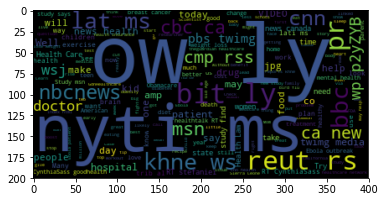

In [301]:
# Nuage des mots des Tweets Bruts

frames = [df["Tweet_Original"][:]]

reviews_names = df4["Tweet_Original"]
for reviews,name in zip(frames,reviews_names):
    text_reviews = " ".join(reviews)
    wordcloud = WordCloud( max_words=1000,margin=0).generate(text_reviews)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("on")
    plt.show()z

# Nuage des mots des Tweets aprés Nettoyage et normalisation avec NLP


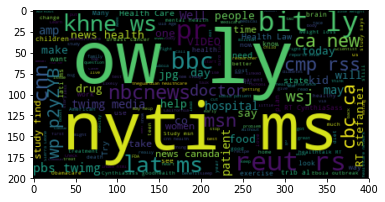

In [304]:

frames = [df["Tweet"][:]]

reviews_names = df4["Tweet"]
for reviews,name in zip(frames,reviews_names):
    text_reviews = " ".join(reviews)
    wordcloud = WordCloud( max_words=1000,margin=0).generate(text_reviews)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("on")
    plt.show()

# Bag of Words

In [309]:
# Initialize a TfidfVectorizer object: tfidf
tfidf = TfidfVectorizer(sublinear_tf=True, 
                        min_df=5, 
                        smooth_idf=False, 
                        encoding='latin-1', 
                        ngram_range=(1, 2), 
                        stop_words='english')

# Bag of Words

In [306]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()

# Créer le Bag-of-Words
bag_of_words = count_vectorizer.fit_transform(df["Tweet"])

# voir le Bag-of-Words
feature_names = count_vectorizer.get_feature_names()
pd.DataFrame(bag_of_words.toarray(), columns = feature_names)

MemoryError: 

# Tf-idf  et  similarité document

In [312]:
# perform text preprocessing similarly as before
tweets = df['Tweet'].str.split().apply(lambda x: [t.lower() for t in x if t.isalpha() and t not in stop_words]).apply(' '.join)

# create document-term matrix
dtm = tfidf.fit_transform(tweets)


In [313]:
# display the shape of the document-term matrix
display(dtm.shape)

(63027, 15993)

In [314]:
# display a random word
display(tfidf.get_feature_names()[random.randint(0,9808)])

'control pill'

In [315]:
from sklearn.decomposition import NMF
# initialize nmf model
nmf = NMF(n_components=6,init='nndsvd',random_state=42,verbose=1)
# fit the model
nmf.fit(dtm_norm)


violation: 1.0
violation: 0.246544131946202
violation: 0.079291454068966
violation: 0.04826634208941787
violation: 0.03428212624120376
violation: 0.02544596108148157
violation: 0.01923736026886467
violation: 0.014711995142216865
violation: 0.01136977556916326
violation: 0.008836084711725528
violation: 0.006892892168793781
violation: 0.005417091990178321
violation: 0.004285423247105435
violation: 0.003407565150320933
violation: 0.002723455001179328
violation: 0.002184411859881072
violation: 0.001757216736237144
violation: 0.0014176986003908815
violation: 0.0011457825935492836
violation: 0.0009283470142644013
violation: 0.0007536607607182642
violation: 0.0006129043805513421
violation: 0.000499181026843007
violation: 0.00040713466845961234
violation: 0.00033245066856833825
violation: 0.00027174572324916915
violation: 0.00022230502619147743
violation: 0.00018205437447397997
violation: 0.00014920866253206563
violation: 0.0001223950951524761
violation: 0.0001004753797278422
violation: 8.2530

NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0,
  max_iter=200, n_components=6, random_state=42, shuffle=False,
  solver='cd', tol=0.0001, verbose=1)

# Tf-idf créer Matrice Document-Term 

In [125]:
from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf vectorizer of scikit learn
vectorizer = TfidfVectorizer(stop_words=stop_words,max_features=10000, max_df = 0.5, use_idf = True, ngram_range=(1,3))

In [126]:
X = vectorizer.fit_transform(detokenized_doc)
print(X.shape) # check shape of the document-term matrix


(63027, 10000)


In [127]:
print(X[0:3]) # check shape of the document-term matrix


  (0, 1173)	0.360005742881
  (0, 1330)	0.270346642886
  (0, 7455)	0.293067749377
  (0, 8819)	0.360359393926
  (0, 1174)	0.376764181544
  (0, 1349)	0.435407954058
  (0, 1177)	0.500029623429
  (1, 3830)	0.489344208191
  (1, 3980)	0.636042065594
  (1, 1396)	0.319514021797
  (1, 6751)	0.503888406872
  (2, 7455)	0.270208125708
  (2, 8023)	0.429470558424
  (2, 6571)	0.491404482408
  (2, 4158)	0.286339657768
  (2, 3859)	0.437056303985
  (2, 4175)	0.477551704482


In [317]:
# les 20 top mots par sujet
for i,topic in enumerate(nmf.components_):
    print(f"Top 20 mots pour le Topic {i}")
    print([tfidf.get_feature_names()[index] for index in topic.argsort()[:-20 - 1:-1]])
    print('\n')

Top 20 mots pour le Topic 0
['harmon', 'cardio weightlifitng', 'hate exercise', 'largely', 'meditation', 'injected', 'mediterranean diet', 'health board', 'health agency', 'raise heart', 'raise awareness', 'excalibur', 'court says', 'person nhs', 'records', 'examines', 'performing', 'beneficiaries', 'weeks health', 'glad']


Top 20 mots pour le Topic 1
['eating disorder', 'odd', 'legs core', 'ebola infections', 'overseas', 'tweeting bra', 'afghanistan', 'homeless', 'learn social', 'fgm', 'sept', 'ebola study', 'september', 'case diagnosed', 'ebola isolation', 'untested', 'wand nhs', 'role nhs', 'newtown', 'transport']


Top 20 mots pour le Topic 2
['takes toll', 'turkish', 'meets main', 'focaccia', 'supplements dont', 'feng shui', 'tal', 'training scheme', 'kids likely', 'scripts', 'gileads hepatitis', 'qnexa', 'health waiting', 'taking statins', 'jfk', 'selected', 'taking care', 'walking latfit', 'medicare data', 'gp practice']


Top 20 mots pour le Topic 3
['carrot', 'thanks great', 

In [128]:
terms = vectorizer.get_feature_names()
print(terms)

['0000', '0000 2014a', '0000 2014rt', '0000 2014the', '0000 2014well', '01', '02', '03', '07', '09', '10', '10 best', '10 days', '10 easy', '10 foods', '10 foods boost', '10 health', '10 health symptoms', '10 healthy', '10 million', '10 minutes', '10 pounds', '10 reasons', '10 states', '10 things', '10 tips', '10 ways', '10 ways cut', '10 weeks', '10 weeks slim', '10 worst', '10 years', '100', '100 calories', '100 calories today', '100 million', '100 pounds', '1000', '10000', '10000 grand', '10000 grand prize', '10000 paying', '10000 paying donors', '10000 steps', '100000', '10000steps', '101', '10minute', '10yearold', '11', '11 et', '11 ways', '110', '119', '11am', '12', '12 pm', '12 pm et', '12 ways', '13', '13 foods', '130', '130 pm', '14', '14 million', '14 surprising', '14 ways', '140', '15', '15 minutes', '150', '15minute', '16', '17', '18', '19', '1999', '1m', '1pm', '1pm est', '1pm et', '1simplechange', '1st', '1st time', '20', '20 minutes', '20 ways', '20 years', '200', '200 c